In [2]:
import scipy.io as scio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from tqdm import tqdm
import seaborn as sns

# Path

In [5]:
load_path = "/Volumes/zhongzh/Data/3D-Ca/MAT-OGDR/CaSignal-OGDR"
save_path = "/Volumes/zhongzh/Data/3D-Ca/MAT-OGDR/12-13/"

# Data process

In [3]:
def conv_f0 (a, ratio):
    '''
    选取其中'ratio'个连续中最小的
    '''
    f_sum = []
    for i in range(0,len(a)-ratio):
        f = 0
        for j in range(i, i+ratio):
            f = f + a[j]
        f_sum.append(f)
    sum = sorted(f_sum)[0]/ratio
    return sum

def regu (fr,ratio=10):
    for i in range(0,fr.shape[0]):
        a = fr.iloc[i]
        f0 = conv_f0(a,ratio)
        for j in range(0,len(a)):
            a[j] = (a[j]-f0)/f0
        fr.iloc[i] = a
    return fr


def peak(fr,thresh=0.5):
    '''
    现在用的是直接用0.5卡阈值
    '''
    for i in range(0,fr.shape[0]):
        a = fr.iloc[i]
        for j in range(0,len(a)):
            if a[j] > thresh:
                a[j] = 1
            else:
                a[j] = 0
        fr.iloc[i] = a
    return fr

def peak_std(fr,p=3,thresh=0):
    '''
    选取每个细胞均值+p*标准差为阈值
    '''
    for i in range(0,fr.shape[0]):
        a = fr.iloc[i]
        mean = np.mean(a)
        std = np.std(a)
        for j in range(0,len(a)):
            if a[j] > mean+p*std:
                a[j] = 1
            else:
                a[j] = 0
        fr.iloc[i] = a
    return fr

In [15]:
df_time = pd.read_excel('/Volumes/zhongzh/Data/3D-Ca/MAT-OGDR/time.xlsx')
name_list = list(df_time['File'])
file_list = [f'CaSignal-{name}_Alexa 488 antibody.mat' for name in name_list]
file_list
file_list_all = list(os.listdir(load_path))
print(len(file_list))
for i, name in enumerate(file_list): 
    if name not in file_list_all: file_list.pop(i)
len(file_list)


64


63

# .mat to .csv

In [98]:
# dirlist = os.listdir(load_path)
# name_list = []
# for dir in tqdm(dirlist):
#     if re.match(r'._', dir): 
#         pass 
#     else: 
#         datapath = load_path + dir 
#         data_all = scio.loadmat(datapath)
#         data = data_all['analysis']
#         fluo = data['F_cell'][0,0]
#         name = re.search(r'20230907Neu-(.*)-MaxIP',dir).group()
#         name_list.append(name)
#         fluo = pd.DataFrame(fluo)
#         fluo.to_csv(save_path + 'F_cell_' + name + '.csv')
#         regu_fluo = fluo.copy()
#         regu(regu_fluo,5)
#         regu_fluo.to_csv(save_path + 'regu_F_cell_' + name + '.csv')
#         peak_fluo = regu_fluo.copy()
#         peak_std(peak_fluo)
#         peak_fluo['sum'] = peak_fluo.apply(lambda x: x.sum()/peak_fluo.shape[1], axis=1)
#         peak_fluo.to_csv(save_path + 'peak_F_cell_' + name + '.csv')

100%|██████████| 90/90 [00:59<00:00,  1.50it/s]


In [4]:
df_time = pd.read_excel('/Volumes/zhongzh/Data/3D-Ca/MAT-time/time.xlsx')
df_time

,File,Time Interval(s)
0,1105N-day1-10x-1-MaxIP.nd2,2.769
1,1105N-day1-10x-2-MaxIP.nd2,1.557
2,1105N-day1-10x-3-MaxIP.nd2,2.379
3,1105N-day1-10x-4-MaxIP.nd2,1.963
4,1105N-day1-10x-5-MaxIP.nd2,2.377
5,1105N-day1-4x-1-MaxIP.nd2,3.064
6,1105N-day1-4x-2-MaxIP.nd2,2.625
7,1105N-day4-10x-1-MaxIP.nd2,2.148
8,1105N-day4-10x-2-MaxIP.nd2,2.146
9,1105N-day4-4x-1-MaxIP.nd2,2.056


In [21]:
p=1.5
df_time = pd.read_excel('/Volumes/zhongzh/Data/3D-Ca/MAT-OGDR/time.xlsx')
save_path = f"/Volumes/zhongzh/Data/3D-Ca/MAT-OGDR/12-13/std{p}/"
if os.path.exists(save_path) is not True: os.mkdir(save_path)
load_path = "/Volumes/zhongzh/Data/3D-Ca/MAT-OGDR/CaSignal-OGDR/"
name_list=[]
for i in tqdm(range(df_time.shape[0])):
    time = df_time['Time Interval(s)'][i]
    file_name = df_time['File'][i]
    # file_name = re.search(r'(.*MaxIP)',file_name).group()
    dir = 'CaSignal-' + file_name + '_Alexa 488 antibody.mat'
    # dir = 'CaSignal-' + file_name + '_FITC' + '.mat'
    datapath = load_path + dir 
    if os.path.exists(datapath):
        data_all = scio.loadmat(datapath)
        data = data_all['analysis']
        fluo = data['F_cell'][0,0]
        # file_name = re.search(r'2023(.*)-MaxIP',dir).group()
        name_list.append(file_name)
        fluo = pd.DataFrame(fluo)
        fluo.to_csv(save_path + 'F_cell_' + file_name + '.csv')
        regu_fluo = fluo.copy()
        regu(regu_fluo, 5)
        regu_fluo.to_csv(save_path + 'regu_F_cell_' + file_name + '.csv')
        peak_fluo = regu_fluo.copy()
        peak_std(peak_fluo,p=p)
        peak_fluo['sum'] = peak_fluo.apply(lambda x: x.sum()/(peak_fluo.shape[1]*time), axis=1)
        peak_fluo.to_csv(save_path + 'peak_F_cell_' + file_name + '.csv')

  0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████| 64/64 [03:37<00:00,  3.40s/it]


In [15]:
data_all = scio.loadmat('/Volumes/zhongzh/Data/3D-Ca/MAT-time/CaSignal-时间/CaSignal-1105N-day7-10x-10-MaxIP_Alexa 488 water.mat')
data = data_all['analysis']
fluo = data['F_cell'][0,0]
name = re.search(r'day(.*)-\d','/Volumes/zhongzh/Data/3D-Ca/MAT-time/CaSignal-时间/CaSignal-1105N-day7-10x-10-MaxIP_Alexa 488 water.mat').group()
name_list.append(name)
fluo = pd.DataFrame(fluo)
fluo.to_csv(save_path + 'F_cell_' + name + '.csv')
regu_fluo = fluo.copy()
regu(regu_fluo,5)
regu_fluo.to_csv(save_path + 'regu_F_cell_' + name + '.csv')
peak_fluo = regu_fluo.copy()
peak_std(peak_fluo)
peak_fluo['sum'] = peak_fluo.apply(lambda x: x.sum()/(peak_fluo.shape[1]*), axis=1)
peak_fluo.to_csv(save_path + 'peak_F_cell_' + name + '.csv')

# Visualization

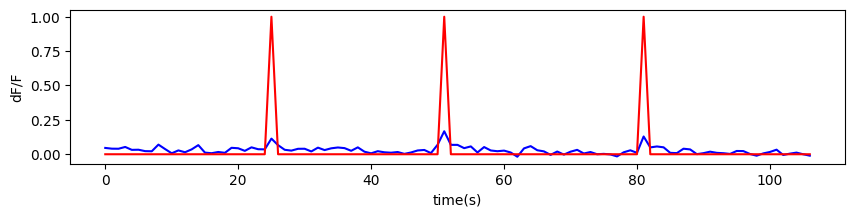

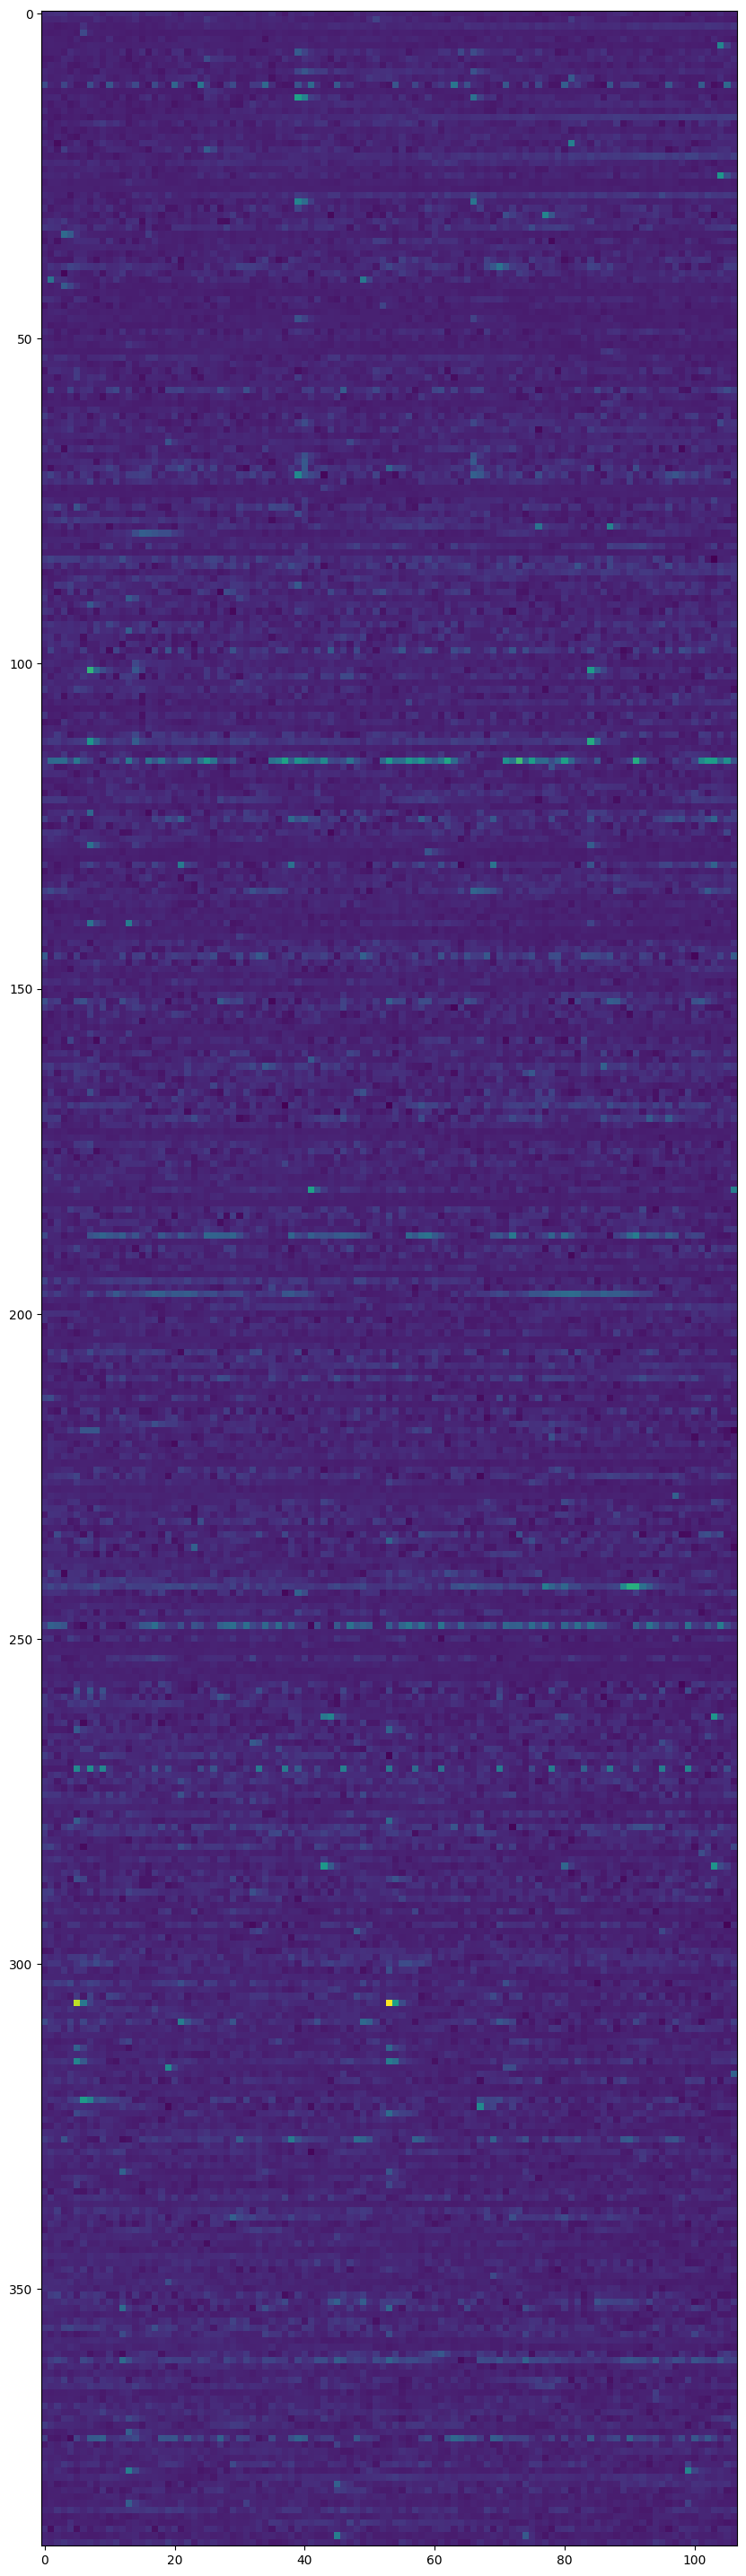

In [5]:
fr = pd.read_csv('/Volumes/zhongzh/Data/3D-Ca/MAT/csv/F_cell_day7-bic-bic-4x-2z.csv')
fr.drop('Unnamed: 0',axis=1,inplace=True)
regu_fr = fr.copy()
regu(regu_fr,5)
fr_peak = regu_fr.copy()
peak_std(fr_peak)
i= 1
plt.figure(figsize=[10,2])
plt.plot(range(0,regu_fr.shape[1]),regu_fr.iloc[i],color = 'blue')
plt.plot(range(0,fr_peak.shape[1]),fr_peak.iloc[i],color = 'red')
plt.xlabel('time(s)')
plt.ylabel('dF/F')
plt.show()
plt.figure(figsize=[10,100])
plt.imshow(np.asarray(regu_fr))
plt.show()

In [1]:
path = '/Volumes/zhongzh/Data/3D-Ca/MAT/csv/'
name = 'F_cell_day7-bic-bic-4x-2z.csv'
fr = pd.read_csv(path + name)
regu_fr = fr.copy()
regu(regu_fr,5)
peak_fr = regu_fr.copy()
peak(peak_fr)


NameError: name 'pd' is not defined

In [29]:
i= 50
plt.figure(figsize=[10,2])
plt.plot(range(0,regu_fr.shape[1]),regu_fr.iloc[i],color = 'blue')
plt.plot(range(0,peak_fr.shape[1]),peak_fr.iloc[i],color = 'red')
plt.xlabel('time(s)')
plt.ylabel('dF/F')
plt.show()

NameError: name 'regu_fr' is not defined

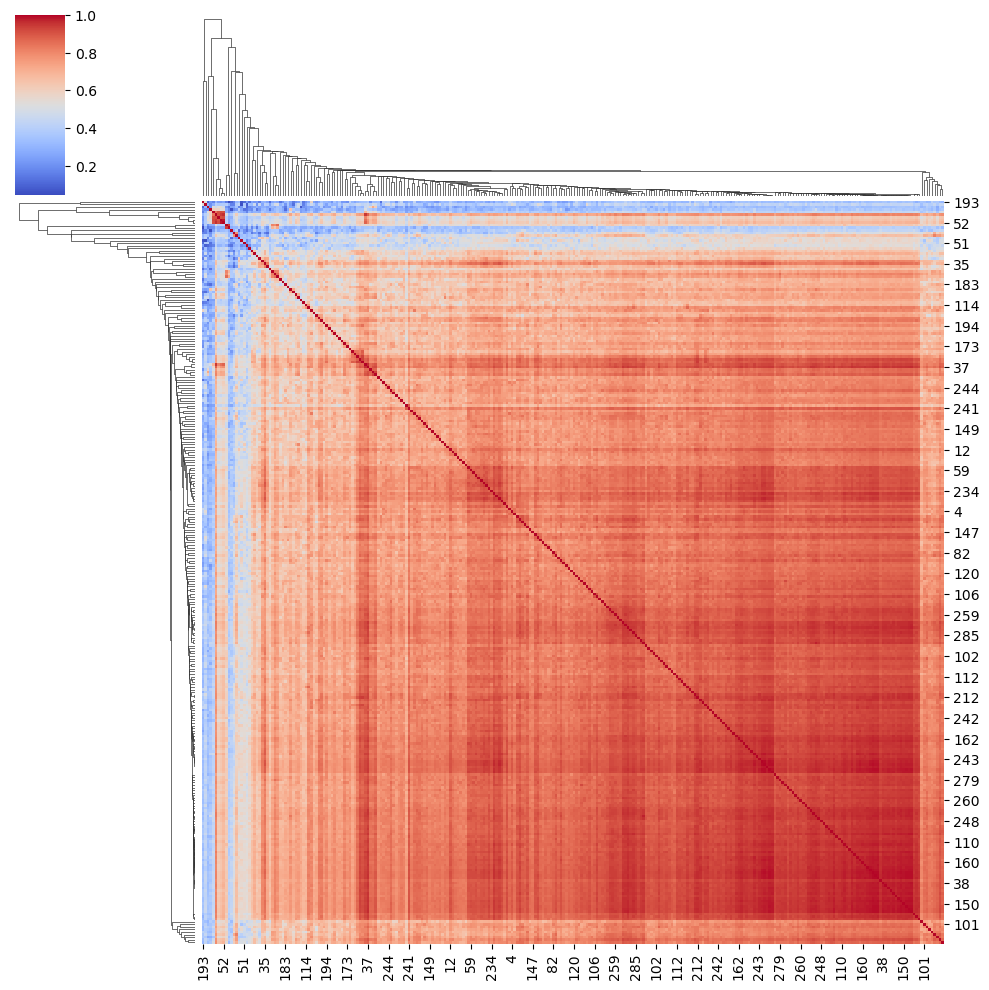

In [20]:

def corr_map(fr):
    fr_t = fr.T
    corr_fr = fr_t.corr()
    return corr_fr

def plot_heat(fr,annot = False, cmap = 'coolwarm'):
    # plt.figure()
    sns.clustermap(corr_map(fr),annot=annot,cmap = cmap,metric='correlation')

plot_heat(regu_fr)
plt.show()